In [3]:
import pandas as pd

In [13]:
df = pd.read_csv("Cleaned_Healthcare_Dataset.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood_Type          55500 non-null  object 
 4   Medical_Condition   55500 non-null  object 
 5   Date_of_Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance_Provider  55500 non-null  object 
 9   Billing_Amount      55500 non-null  float64
 10  Room_Number         55500 non-null  int64  
 11  Admission_Type      55500 non-null  object 
 12  Discharge_Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test_Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

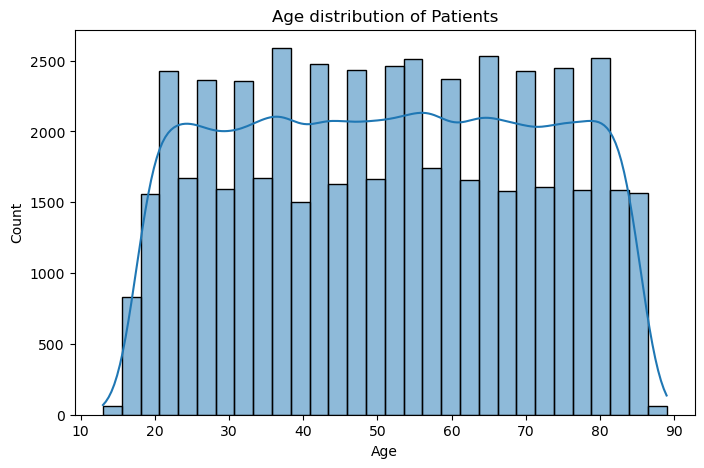

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

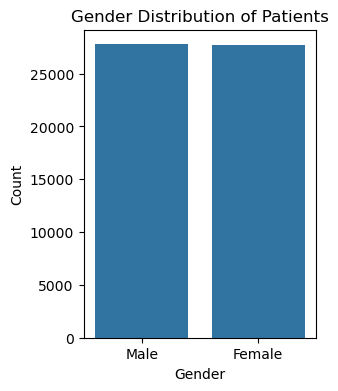

In [16]:
plt.figure(figsize=(3,4))
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution of Patients")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

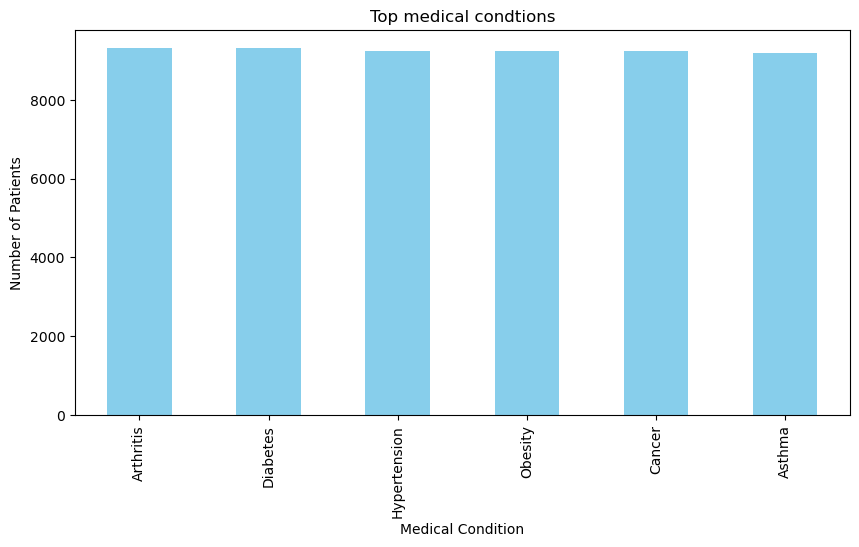

In [42]:
plt.figure(figsize=(10,5))
df['Medical_Condition'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top medical condtions")
plt.xlabel("Medical Condition")
plt.ylabel("Number of Patients")
plt.show()

In [19]:
df['Date_of_Admission'] = pd.to_datetime(df['Date_of_Admission'], dayfirst=True)

In [20]:
df['Discharge_Date'] = pd.to_datetime(df['Discharge_Date'], dayfirst=True)

In [21]:
df['Hospital_Stay_Days'] = (df['Discharge_Date'] - df['Date_of_Admission'])

In [22]:
avg_stay = df['Hospital_Stay_Days'].mean()
print(f"Average Hospital Stay Duration : {avg_stay.days} days")

Average Hospital Stay Duration : 15 days


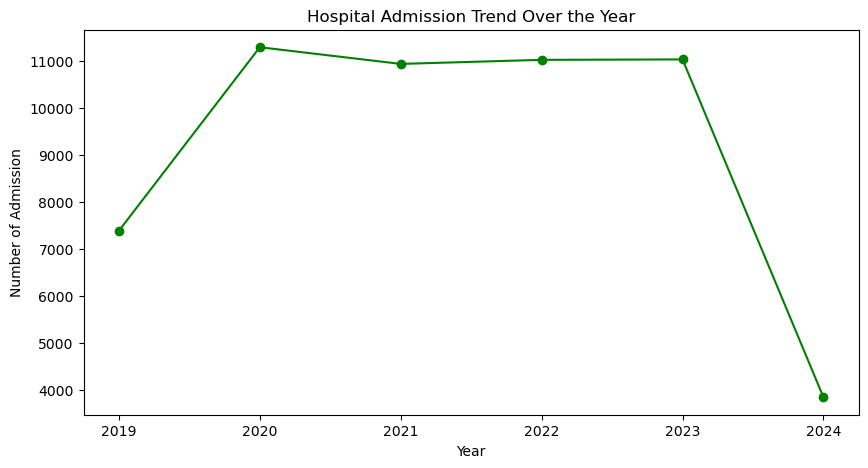

In [23]:
df['Year'] = df['Date_of_Admission'].dt.year
plt.figure(figsize=(10,5))
df['Year'].value_counts().sort_index().plot(kind='line', marker='o', color='green')
plt.title("Hospital Admission Trend Over the Year")
plt.xlabel("Year")
plt.ylabel("Number of Admission")
plt.show()

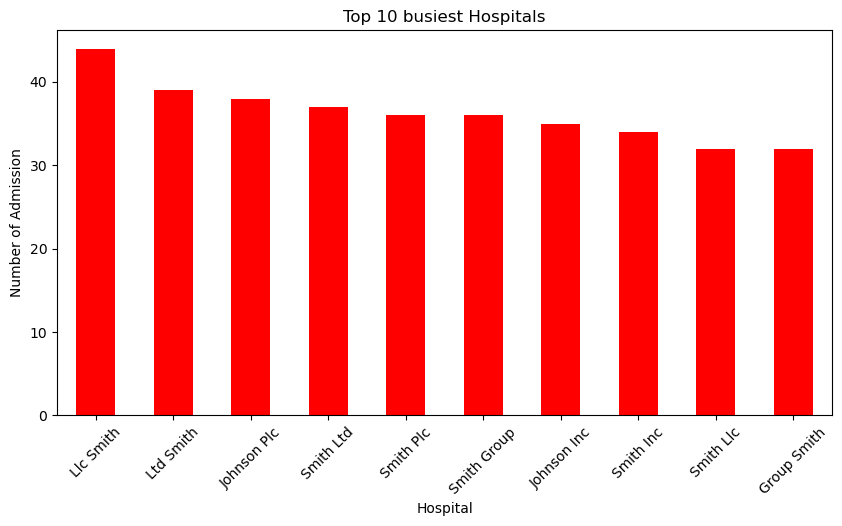

In [24]:
plt.figure(figsize=(10,5))
df['Hospital'].value_counts().head(10).plot(kind='bar', color='red')
plt.title("Top 10 busiest Hospitals")
plt.xlabel("Hospital")
plt.ylabel("Number of Admission")
plt.xticks(rotation=45)
plt.show()

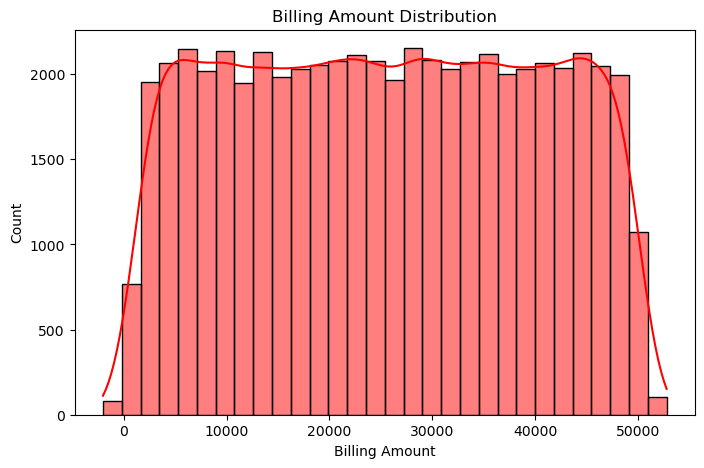

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(df['Billing_Amount'], bins=30, kde=True, color='red')
plt.title("Billing Amount Distribution")
plt.xlabel("Billing Amount")
plt.ylabel("Count")
plt.show()

C:\Users\Saraj\AppData\Local\Temp\ipykernel_22596\1077782394.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Insurance_Provider'].replace(' ', 'Uninsured', inplace=True)


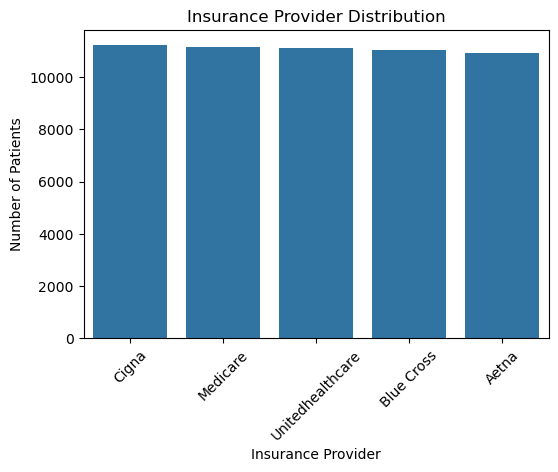

In [26]:
plt.figure(figsize=(6,4))
df['Insurance_Provider'].replace(' ', 'Uninsured', inplace=True)
sns.countplot(x='Insurance_Provider', data=df, order=df['Insurance_Provider'].value_counts().index)
plt.title("Insurance Provider Distribution")
plt.xlabel("Insurance Provider")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.show()


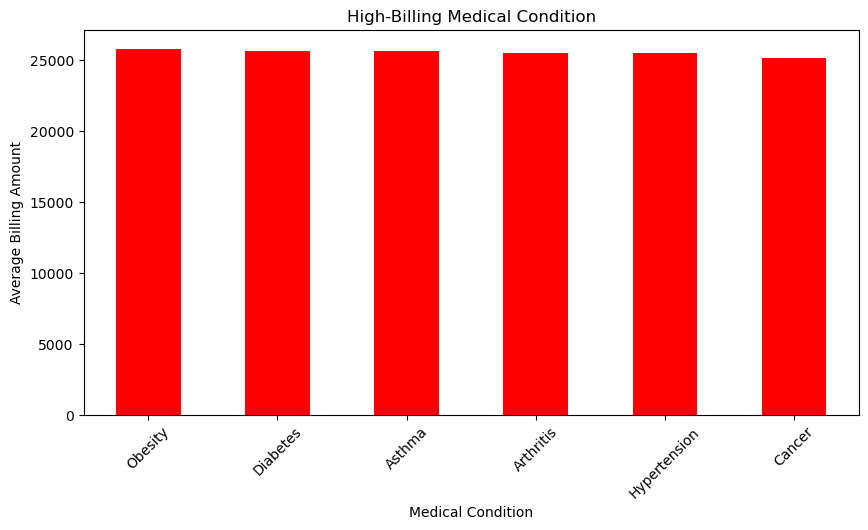

In [41]:
plt.figure(figsize=(10,5))
df.groupby('Medical_Condition')['Billing_Amount'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='red')
plt.title("High-Billing Medical Condition")
plt.xlabel("Medical Condition")
plt.ylabel("Average Billing Amount")
plt.xticks(rotation=45)
plt.show()

In [28]:
avg_stay_per_condition = df.groupby("Medical_Condition")["Hospital_Stay_Days"].mean().sort_values(ascending=False)


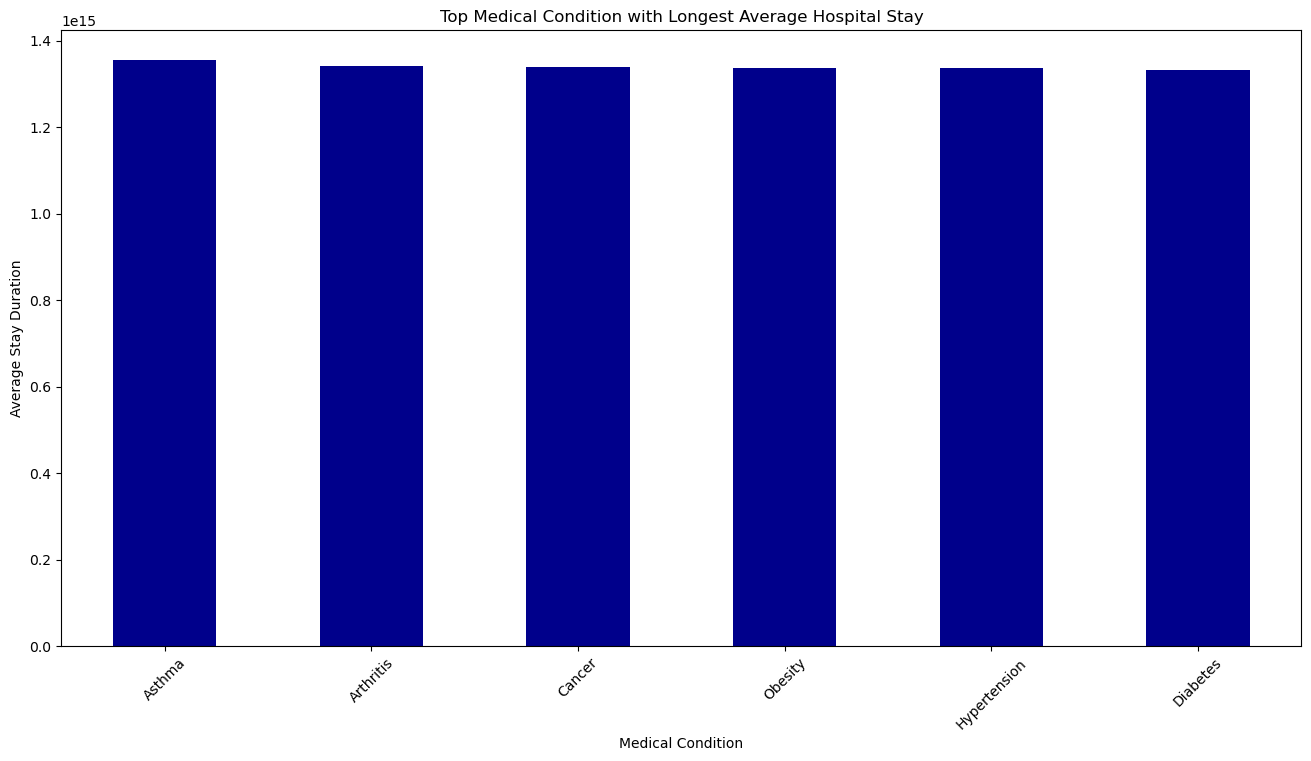

In [44]:
plt.figure(figsize=(16,8))
avg_stay_per_condition.head(10).plot(kind='bar', color='darkblue')
plt.title("Top Medical Condition with Longest Average Hospital Stay")
plt.xlabel("Medical Condition")
plt.ylabel("Average Stay Duration")
plt.xticks(rotation=45)
plt.show()

In [30]:
avg_billing_per_hospital = df.groupby("Hospital")["Billing_Amount"].mean().sort_values(ascending=False)


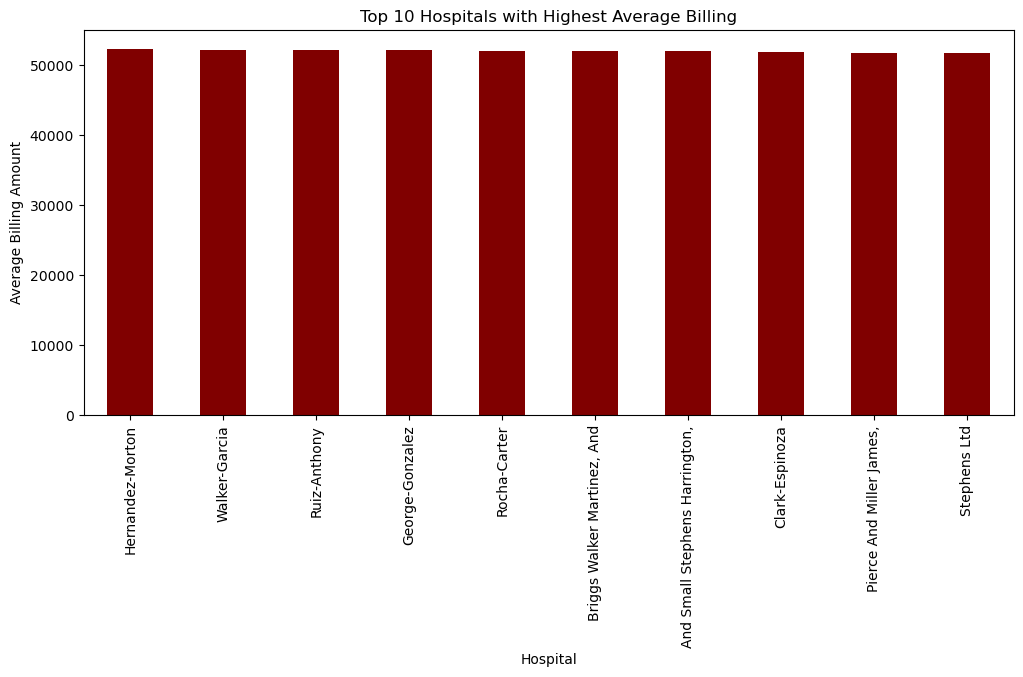

In [31]:
plt.figure(figsize=(12,5))
avg_billing_per_hospital.head(10).plot(kind='bar', color='maroon')
plt.title("Top 10 Hospitals with Highest Average Billing")
plt.xlabel("Hospital")
plt.ylabel("Average Billing Amount")
plt.xticks(rotation=90)
plt.show()

C:\Users\Saraj\AppData\Local\Temp\ipykernel_22596\2876816161.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Admission_Type", data=df, palette="Set1")


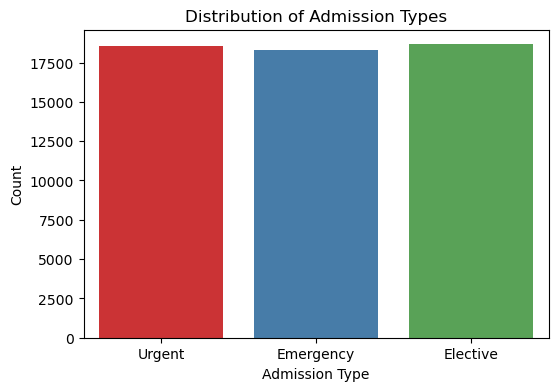

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(x="Admission_Type", data=df, palette="Set1")
plt.title("Distribution of Admission Types")
plt.xlabel("Admission Type")
plt.ylabel("Count")
plt.show()

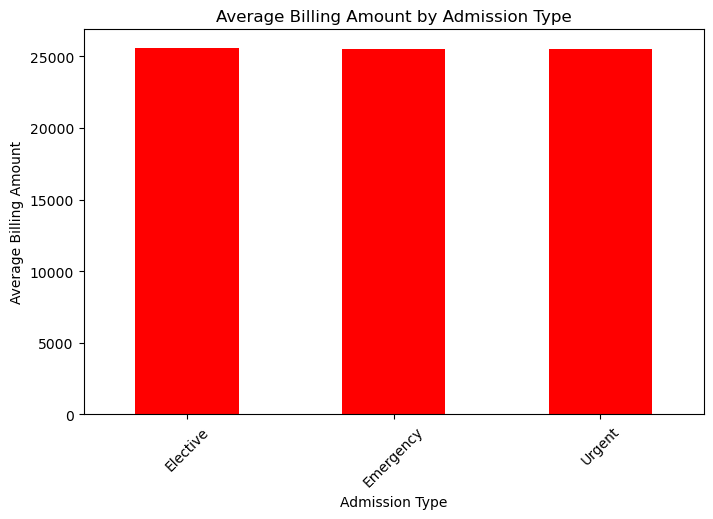

In [33]:
plt.figure(figsize=(8,5))
df.groupby("Admission_Type")["Billing_Amount"].mean().plot(kind='bar', color='red')
plt.title("Average Billing Amount by Admission Type")
plt.xlabel("Admission Type")
plt.ylabel("Average Billing Amount")
plt.xticks(rotation=45)
plt.show()


In [34]:
df["Admission_Month"] = df["Date_of_Admission"].dt.month_name()


In [35]:
monthly_admissions = df["Admission_Month"].value_counts().sort_index()

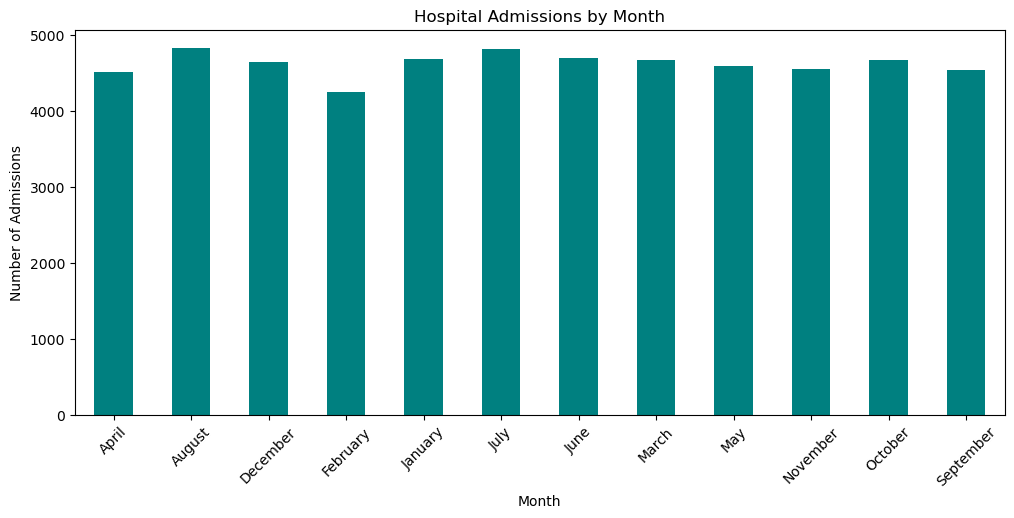

In [36]:
plt.figure(figsize=(12, 5))
monthly_admissions.plot(kind='bar', color='teal')
plt.title("Hospital Admissions by Month")
plt.xlabel("Month")
plt.ylabel("Number of Admissions")
plt.xticks(rotation=45)
plt.show()

In [37]:
avg_billing_insurance = df.groupby("Insurance_Provider")["Billing_Amount"].mean().sort_values(ascending=False)

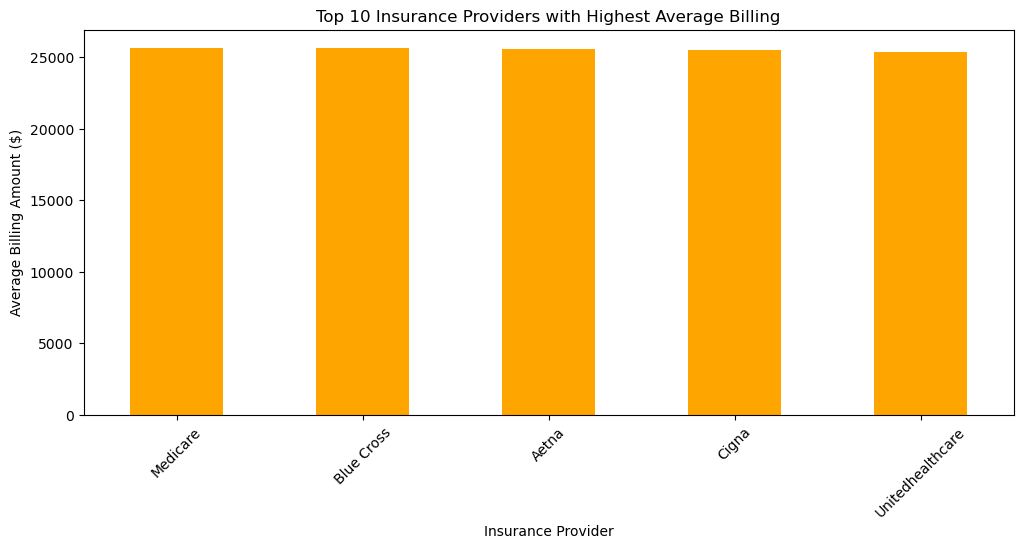

In [38]:
plt.figure(figsize=(12, 5))
avg_billing_insurance.head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Insurance Providers with Highest Average Billing")
plt.xlabel("Insurance Provider")
plt.ylabel("Average Billing Amount ($)")
plt.xticks(rotation=45)
plt.show()

In [39]:
from scipy.stats import ttest_ind

cigna_billing = df[df["Insurance_Provider"] == "Cigna"]["Billing_Amount"]
aetna_billing = df[df["Insurance_Provider"] == "Aetna"]["Billing_Amount"]

t_stat, p_value = ttest_ind(cigna_billing, aetna_billing, equal_var=False)

print("Cigna vs Aetna Billing Comparison:")
print(f"T-statistic = {t_stat:.4f}")
print(f"P-value     = {p_value:.4f}")


Cigna vs Aetna Billing Comparison:
T-statistic = -0.1437
P-value     = 0.8857


In [40]:

urgent_billing = df[df["Admission_Type"] == "Urgent"]["Billing_Amount"]
elective_billing = df[df["Admission_Type"] == "Elective"]["Billing_Amount"]

t_stat, p_value = ttest_ind(urgent_billing, elective_billing, equal_var=False)

print("Urgent vs Elective Admission Billing:")
print(f"T-statistic = {t_stat:.4f}")
print(f"P-value     = {p_value:.4f}")


Urgent vs Elective Admission Billing:
T-statistic = -0.5751
P-value     = 0.5652
